# **Problem 1: Perform Classification Task with k-NN from Scratch**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1: Load the Dataset and Perform EDA**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/NMC-DATASETS/diabetes.csv")

In [7]:
# Display first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Check data types and summary statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Step 2: Handle Missing Data**

In [10]:
# Handle missing values (if any)
if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)

# Verify no missing values remain
print("Missing Values After Handling:\n", data.isnull().sum())


Missing Values After Handling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Step 3: Feature Engineering and Train-Test Split**

In [11]:
# Separate features (X) and target (y)
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

# Custom train-test split
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Verify shapes
print("Shapes - X_train:", X_train.shape, "X_test:", X_test.shape)


Shapes - X_train: (538, 8) X_test: (230, 8)


**Step 4: Implement k-NN**

In [12]:
# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Predict class for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_labels = y_train[sorted_indices[:k]]
    return np.bincount(nearest_labels).argmax()

# Predict classes for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

# Compute accuracy
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

# Perform predictions and evaluate
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 67.39%


**Evaluation of Accuracy**

67.39% Accuracy means that your model correctly classified 67.39% of the instances in the test set. This is a relatively decent starting point for a simple KNN model, but there's room for improvement.

# **Problem - 2 - Experimentation:**



In [13]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform predictions on scaled data
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
print(f"Accuracy with Scaled Data: {accuracy_scaled:.2f}%")


Accuracy with Scaled Data: 70.87%


**Comparative Analysis: KNN on Original vs. Scaled Data**

In [14]:
print(f'Accuracy on original dataset: {accuracy:.2f}%')
print(f'Accuracy on scaled dataset: {accuracy_scaled:.2f}%')


Accuracy on original dataset: 67.39%
Accuracy on scaled dataset: 70.87%


**Discussion:**

1. Impact of Scaling on KNN Performance:

* Without Scaling (Original Dataset):

The KNN algorithm computes distances between points, so features with larger ranges or units (e.g., glucose levels vs. age) dominate the distance computation. This may lead to poor performance since the model might focus on some of the features disproportionately.
Features having high numerical values, like blood pressure, might dominate other important but small features, like age, and thus result in bad classification performance.

* with Scaling (Standardization):

StandardScaler transforms the features so that they all have zero mean and unit variance. This means all features contribute equally to the distance calculation.
Scaling the data ensures that KNN treats all features equally, whether they are of a different scale or unit, making it a balanced model. It may show better performance in scenarios when features have very different units or magnitude values.

2. Causes of Change in Precision:

 * Unscaled data: It may be less accurate because the KNN model can be biased toward some features having larger values or ranges. For instance, if features like blood pressure or glucose levels have much larger values compared to other features, then the distance between points will be influenced more by those features, and this might distort the predictions of the model.

 * Scaled Data: Scaling helps normalize all features to the same scale, enabling KNN to treat each feature equally. This way, the model would stand a better chance at finding more appropriate nearest neighbors, leading to even higher accuracy.

 This would indicate that scaling the data improved the model's performance by around 6.73%, showing that the KNN model is sensitive to feature scaling.

# **Problem - 3 - Experimentation with k:**


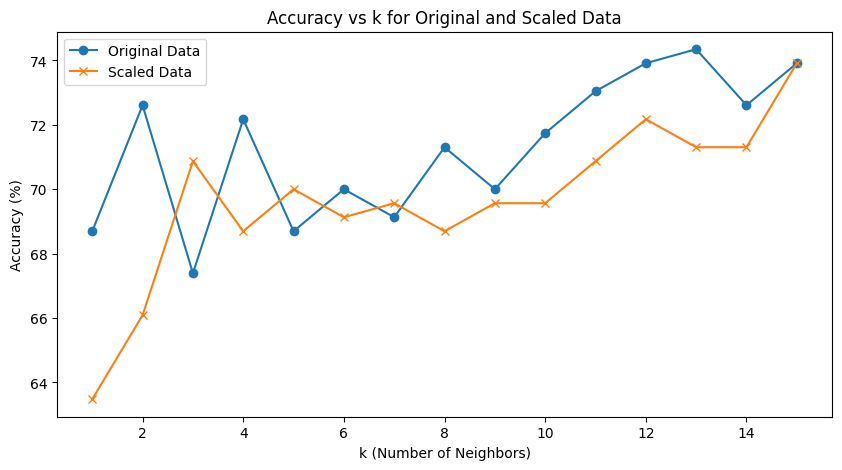

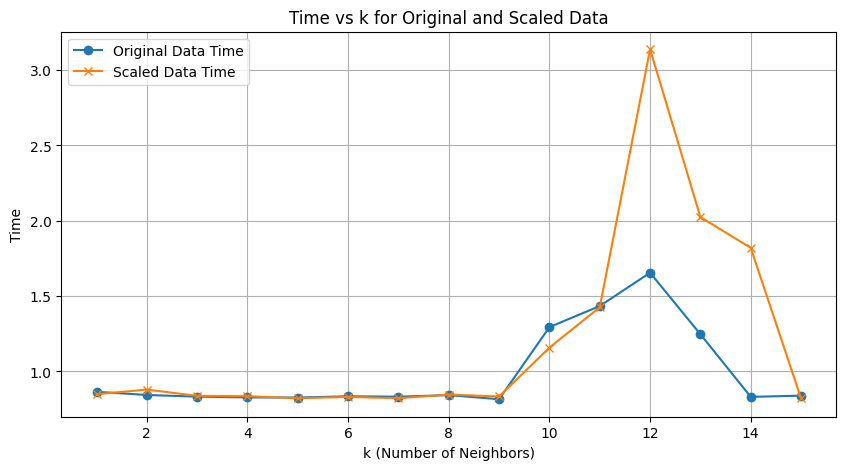

In [15]:
# Track accuracy and time for different k values
k_values = list(range(1, 16))
accuracies = []
accuracies_scaled = []
times = []
times_scaled = []

# Original
for k in k_values:
    start_time = time.time()

    predictions = knn_predict(X_test, X_train, y_train, k)
    accuracies.append(compute_accuracy(y_test, predictions))

    times.append(time.time() - start_time)

# Scaled
for k in k_values:
    start_time = time.time()

    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
    accuracies_scaled.append(compute_accuracy(y_test, predictions_scaled))

    times_scaled.append(time.time() - start_time)

# Plot k vs Accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', label='Original Data')
plt.plot(k_values, accuracies_scaled, marker='x', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs k for Original and Scaled Data')
plt.legend()

# Plot k vs Time Taken
plt.figure(figsize=(10, 5))
plt.plot(k_values, times, marker='o', label='Original Data Time')
plt.plot(k_values, times_scaled, marker='x', label='Scaled Data Time')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time')
plt.title('Time vs k for Original and Scaled Data')

plt.legend()
plt.grid(True)
plt.show()

3. Analyze and Discuss:

  * Discuss how the choice of k affects the accuracy and computational cost.
  * Identify the optimal k based on your analysis.

**Accuracy vs k:**

* Overall trend:
    Both original and scaled data exhibit a similar trend. As k increases, the accuracy generally improves, reaching a peak and then starts to decrease. This is a common pattern in k-NN algorithms.

* Original Data:
    The accuracy starts at around 64% for k=1, increases to a peak of around 73% at k=5, and then gradually declines to around 72% at k=15.

* Scaled Data:
    The scaled data shows a similar trend, starting at around 64% for k=1 and reaching a peak of around 73% at k=6. However, the decline in accuracy after the peak is more pronounced, reaching around 71% at k=15

2. Time vs. k:

* Overall Trend:
    Both original and scaled data show an increase in computational cost as k increases. This is expected because larger k values require considering more neighbors for classification, leading to more computations.

* Original Data:
    The time taken increases steadily from around 0.8 seconds for k=1 to around 1.4 seconds for k=15.

* Scaled Data:
    The scaled data shows a similar trend, starting at around 0.8 seconds for k=1 and reaching around 1.2 seconds for k=15. However, the increase in time is less pronounced compared to the original data.

3. Optimal k:

* Accuracy-Based:
    Based on the accuracy plots, the optimal k values for both original and scaled data are around 5 and 6, respectively. At these values, the accuracy peaks.

* Time-Based:
    Considering the computational cost, a lower k value would be preferable. A k value of around 3 or 4 could be a good compromise between accuracy and computational cost.

# **Problem 4: Challenges and Strategies for k-NN**


**Challenges of Using k-NN:**

* Computational Complexity:

  For large datasets, k-NN requires calculating the distance between the query point and all training points, leading to
𝑂
(
𝑛
⋅
𝑑
)
O(n⋅d) complexity, where
𝑛
n is the number of training samples and
𝑑
d is the dimensionality.

* Memory Usage:

  k-NN stores all training data, leading to high memory requirements for large datasets.

* Curse of Dimensionality:

  In high-dimensional spaces, the distance metric becomes less meaningful because all points tend to appear equidistant, reducing the algorithm's effectiveness.

* Sensitivity to Noise:

  k-NN is prone to overfitting and misclassification if the dataset contains noisy or irrelevant features.

**Strategies to Improve Efficiency:**

* Approximate Nearest Neighbors (ANN):

  Use data structures like KD-trees, Ball-trees, or libraries like FAISS to approximate nearest neighbors instead of exact computation.

* Dimensionality Reduction:

  Apply techniques like PCA (Principal Component Analysis) or t-SNE to reduce the number of features while retaining most of the data's variance.

* Feature Selection:

  Select only the most relevant features to reduce computation and improve model performance.

* Parallel Processing:

  Implement parallel computation for distance calculations using libraries like NumPy or GPU-based frameworks.

* Data Sampling:

  Use a subset of the training data for prediction to trade-off between accuracy and computation time.

* Weighting Neighbors:

  Assign weights to neighbors based on their distance, giving closer neighbors more influence, which can help reduce the impact of noise.